In [ ]:

# Beginning of project:
# This project took a data set from the Enron scandal of the 2000s and used it for sentiment analysis. 
# It was a fun learning experience. 
# I used regex to help clean the many random items from the dataset, 
# I used Vader sentiment to help me with the sentiment analysis itself, because I had to 
# Do it by hand
# Vader uses a lexicon and rule based algorithm to perform this analysis
# I then used Sklearn to perform SVm classification and test on my data
# My goal was to explain what the overall sentiment of the company was. 


The websites I used were:
https://www.cs.cmu.edu/~enron/ 
//www.thepythoncode.com/article/vaderSentiment-tool-to-extract-sentimental-values-in-texts-using-python

The data set is so large that I cannot put it on github but it can be found at the link above.

In [2]:
# First, a ton of libraries
# Pandas the usual, along with numpy
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
pd.options.display.max_colwidth = 200
import time
from sklearn import svm
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [4]:

#df = pd.read_csv("enron_mail_201505.tar.gz", error_bad_lines=False, encoding = 'latin1')
#df.to_csv("New folder/newfile1.csv")


In [ ]:
# I then saved it to a csv so it was easier to handle.

In [ ]:
# Because the data was not curated at all I had to 
# through the steps of cleaning it manually through trial and error

In [ ]:
# tons of Regex, tons of stuff that worked and maybe did not
pattern = "^\w+:\s+[\w.+-]+@[\w-]+\.[\w.-]+"
filt = df['Unnamed:0'].str.contains(pattern)
df = df[~filt]
df.to_csv("Filtering_step_1.csv")
df1=pd.read_csv('Filtering_step_1.csv')
pattern = "^\w+:\s+[\w.+-]+.\s+[\w.+-]+.*?ENRON"
filt = df1['Unnamed: 0'].str.contains(pattern,na=False)
df = df1[~filt]
pattern = "Subject:.*($|\s)"
df1 = df[~filt]
new_df = pd.DataFrame(columns=['Dates', 'Times', 'Messages'])
# First regex
dates = r"Date:.*$"
# Filtering the times
times = r"^.*?(PDT)."
# Now this might work to filter out a bunch of stuff(Anything that does not have :)
messages = r"^(?!.*:).*"

In [ ]:
filtdate = []
if len(new_df['Dates']) == 0:
    filt = df['Unnamed: 0'].str.contains(dates,na=False)
    filtdate = filt[0]

In [ ]:
df3 = df[filt]
df3=df3.rename(columns={"Unnamed: 0.1": "Message","Unnamed: 0": "Day", "maildir/": "Date_and_time"})

In [ ]:
# Now I have something to use to search a list of indexes
searching=df3.index.values
# made some variables
i = searching[1]
j = searching[2]

In [ ]:
searcher =list(searching)
searcher=searcher[1:]
searcher=searcher[1:]
searcher=np.array(searcher)
i =searcher[0]
j = searcher[1]
filt = df1.contains(messages,na=False) 
filt = df1['Unnamed: 0'].str.contains(messages,na=False) 
df7 = df1[filt]
selection=df7['Unnamed: 0'] #Select
selection = pd.DataFrame(selection)
selection=selection.rename(columns={"Unnamed: 0": "Message"}) # Rename cols
df5 = df3.append(selection, ignore_index=False) # append to my df
df5 = df5.sort_index() # sort index
df5.head(10)


In [9]:
# Then I think I had to stuff all the data back together This is after a bunch of cleaning

df=pd.read_csv("Filtering_step_2.csv")

In [10]:
df.head()

,Unnamed: 0,Message,Day,Date_and_time
0,0,0,Date: Fri,14 Sep 2001 14:05:43 -0700 (PDT)
1,12,Name\t\t\tNew Title\t\t\t\tEffective Date\t\t\tMid Year promotion Yes/No,NaN,NaN
2,13,Floyd,NaN,NaN
3,14,Buehler,NaN,NaN
4,15,Wagoner,NaN,NaN


In [ ]:
# It looks much better, I did more Eda and then finally came up with a reduced file.
# Dropping Nans etc

In [163]:
len(df)

30001

In [25]:
df=pd.read_csv("Dataframe_toWork_with")

In [26]:
df.head()

,Unnamed: 0,Date,Message
0,0,1998-12-03,'Twas The Night Before Christmas as written by a lawyer 'Twas the nocturnal segment of the diurnal period preceding the annual Yuletide celebration was not in evidence among the possessors of th...
1,1,1998-12-03,Hosiery was meticulously suspended from the forward edge of the wood burning caloric apparatus regarding an imminent visitation from an eccentric philanthropist among whose folkloric appellati...
2,2,1998-12-03,Nicholas (party of the second part).
3,3,1998-12-03,The prepubescent siblings accommodations of repose hallucinations of variegated fruit confections moving rhythmically through their cerebrums.
4,4,1998-12-03,My conjugal partner and I coverings when upon the avenaceous exterior portion of the grounds there ascended such a cacophony of dissonance that I felt compelled to arise with alacrity from my ...


In [27]:
sentences = df["Message"]
Trying_small = sentences[0:10000]
df['Compound']= ""
analyzer = SentimentIntensityAnalyzer()

In [28]:
dicti = []
for sentence in Trying_small:
   score = analyzer.polarity_scores(sentence)["compound"]
   dicti.append(score)

In [29]:
len(df)

7044891

In [30]:
Trying_small1 = sentences[4040001:4050000]


In [31]:
len(df)

7044891

In [32]:
dicti2 = []
for sentence in Trying_small1:
   score = analyzer.polarity_scores(sentence)["compound"]
   dicti2.append(score)

In [33]:
len(df)

7044891

In [34]:
Trying_small2 = sentences[7034892:7044891]

In [35]:
len(df)

7044891

In [36]:
dicti3 = []
for sentence in Trying_small2:
   score = analyzer.polarity_scores(sentence)["compound"]
   dicti3.append(score)

In [37]:
beginning = df[0:10000]
middle=df[4040001:4050000]
end=df[7034892:7044891]

In [38]:
len(df)

7044891

In [39]:
df

,Unnamed: 0,Date,Message,Compound
0,0,1998-12-03,'Twas The Night Before Christmas as written by a lawyer 'Twas the nocturnal segment of the diurnal period preceding the annual Yuletide celebration was not in evidence among the possessors of th...,
1,1,1998-12-03,Hosiery was meticulously suspended from the forward edge of the wood burning caloric apparatus regarding an imminent visitation from an eccentric philanthropist among whose folkloric appellati...,
2,2,1998-12-03,Nicholas (party of the second part).,
3,3,1998-12-03,The prepubescent siblings accommodations of repose hallucinations of variegated fruit confections moving rhythmically through their cerebrums.,
4,4,1998-12-03,My conjugal partner and I coverings when upon the avenaceous exterior portion of the grounds there ascended such a cacophony of dissonance that I felt compelled to arise with alacrity from my ...,
...,...,...,...,...
7044886,7044886,2001-12-31,.,
7044887,7044887,2001-12-31,More Videos Than You Have Free Time And Clean Undies As Well As Loads Of Live Feeds And Live Chats To Keep You Going On Those ...,
7044888,7044888,2001-12-31,.,
7044889,7044889,2001-12-31,.,


In [40]:
beginning = df[0:10000]
middle=df[4040001:4050000]
end=df[7034892:7044891]
beginning=beginning[["Date","Message"]]
middle=middle[["Date","Message"]]
end = end[["Date","Message"]]

In [42]:
dict10 = pd.DataFrame(dicti,columns=['Compound'])
dat1 = pd.concat( [beginning,dict10],axis=1)
dat1.head()

,Date,Message,Compound
0,1998-12-03,'Twas The Night Before Christmas as written by a lawyer 'Twas the nocturnal segment of the diurnal period preceding the annual Yuletide celebration was not in evidence among the possessors of th...,0.4019
1,1998-12-03,Hosiery was meticulously suspended from the forward edge of the wood burning caloric apparatus regarding an imminent visitation from an eccentric philanthropist among whose folkloric appellati...,-0.1779
2,1998-12-03,Nicholas (party of the second part).,0.4019
3,1998-12-03,The prepubescent siblings accommodations of repose hallucinations of variegated fruit confections moving rhythmically through their cerebrums.,0.0000
4,1998-12-03,My conjugal partner and I coverings when upon the avenaceous exterior portion of the grounds there ascended such a cacophony of dissonance that I felt compelled to arise with alacrity from my ...,0.0516


In [44]:
dict11 = pd.DataFrame(dicti2,columns=['Compound'])
dat2 = pd.concat( [middle,dict11],axis=1)


In [45]:
dict12 = pd.DataFrame(dicti3,columns=['Compound'])
end = end.reset_index(drop=True)
dat3 = pd.concat( [end,dict12],axis=1)

In [46]:
list1 = (dat1,dat2,dat3)
df_new = pd.concat(list1)
df_new.head()
len(df_new)

39997

In [47]:
df_new

,Date,Message,Compound
0,1998-12-03,'Twas The Night Before Christmas as written by a lawyer 'Twas the nocturnal segment of the diurnal period preceding the annual Yuletide celebration was not in evidence among the possessors of th...,0.4019
1,1998-12-03,Hosiery was meticulously suspended from the forward edge of the wood burning caloric apparatus regarding an imminent visitation from an eccentric philanthropist among whose folkloric appellati...,-0.1779
2,1998-12-03,Nicholas (party of the second part).,0.4019
3,1998-12-03,The prepubescent siblings accommodations of repose hallucinations of variegated fruit confections moving rhythmically through their cerebrums.,0.0000
4,1998-12-03,My conjugal partner and I coverings when upon the avenaceous exterior portion of the grounds there ascended such a cacophony of dissonance that I felt compelled to arise with alacrity from my ...,0.0516
...,...,...,...
9994,2001-12-31,.,0.0000
9995,2001-12-31,More Videos Than You Have Free Time And Clean Undies As Well As Loads Of Live Feeds And Live Chats To Keep You Going On Those ...,0.7964
9996,2001-12-31,.,0.0000
9997,2001-12-31,.,0.0000


Text(0.5, 1.0, 'Histogram of Values')

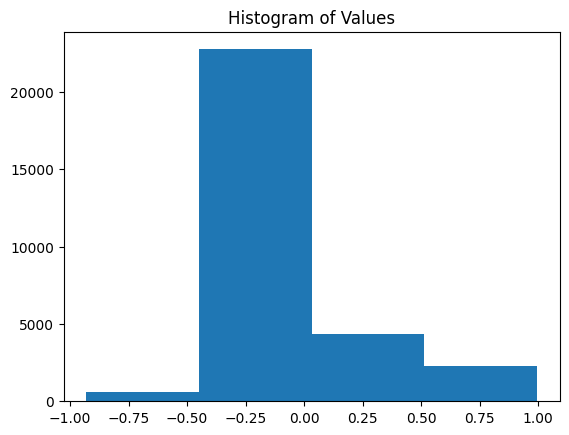

In [48]:
# The classifier gives scores between -1 and 1, 0 being neutral so I had to organize all of them.
# Before I label it. Let me see how the actual data is distributed.
plt.hist(df_new['Compound'],bins=4)
plt.title("Histogram of Values")
# It looks like most values are neutral

In [49]:
df_new.Compound.mean()
print("Mean Value of the data I chose :", df_new.Compound.mean())

Mean Value of the data I chose : 0.0749797053136876


In [50]:
df_new.Compound.max()
print("Max Value of the data I chose :", df_new.Compound.max())

Max Value of the data I chose : 0.995


In [51]:
df_new.Compound.min()
print("Min Value of the data I chose :", df_new.Compound.min())

Min Value of the data I chose : -0.9314


In [52]:
# I then Crated labels of positive and negative based on the ratings and my new file became

df = df.reset_index(drop=True)
df=pd.read_csv('labelled_data')
df=df[['Message','Sentiment_result']]
df.Sentiment_result.unique()

array(['pos', 'neg', 'neutral'], dtype=object)

In [97]:
# Now I think my data is actually ready to be used for a support vector machine

In [98]:
df.head()

,Message,Sentiment_result
0,Twas The Night Before Christmas as written by a lawyer Twas the nocturnal segment of the diurnal period preceding the annual Yuletide celebration was not in evidence among the possessors of this...,pos
1,Hosiery was meticulously suspended from the forward edge of the wood burning caloric apparatus regarding an imminent visitation from an eccentric philanthropist among whose folkloric appellati...,neg
2,Nicholas party of the second part.,pos
3,The prepubescent siblings accommodations of repose hallucinations of variegated fruit confections moving rhythmically through their cerebrums.,neg
4,My conjugal partner and I coverings when upon the avenaceous exterior portion of the grounds there ascended such a cacophony of dissonance that I felt compelled to arise with alacrity from my ...,pos


In [107]:
import re
df= pd.read_csv('labelled_data')
patterin = r'([F{2,}])'
df = df.replace(patterin, " ",regex=True)
patterin = r'([X{2,}])'
df = df.replace(patterin, " ",regex=True)
df = df[['Message','Sentiment_result']]
df = df.reset_index(drop=True)
df = df.loc[df.Message.str.len() > 5].reset_index(drop=True)


In [108]:
# Shaping data
df.shape
# Splitting it
train, test = train_test_split(df, test_size=0.2)
# Just very basic here
vectorizer = TfidfVectorizer()
# Train and transform
train_vectors1 = vectorizer.fit_transform(train['Message'])
test_vectors1 = vectorizer.transform(test['Message'])

In [109]:
classifier_linear = svm.SVC(kernel='linear')

classifier_linear.fit(train_vectors1, train['Sentiment_result'])

prediction_linear = classifier_linear.predict(test_vectors1)


In [119]:
y_pred=prediction_linear
y_true=test['Sentiment_result']


In [115]:
# Now for a non-linear-classifier
report = classification_report(test['Sentiment_result'], prediction_linear, output_dict=True)

In [120]:
report = pd.DataFrame(report)
report

,neg,pos,accuracy,macro avg,weighted avg
precision,0.943728,0.954882,0.94711,0.949305,0.947395
recall,0.979617,0.880745,0.94711,0.930181,0.947110
f1-score,0.961338,0.916317,0.94711,0.938827,0.946536
support,3287.000000,1610.000000,0.94711,4897.000000,4897.000000


In [124]:
matrix=confusion_matrix(y_true,y_pred)

<AxesSubplot: >

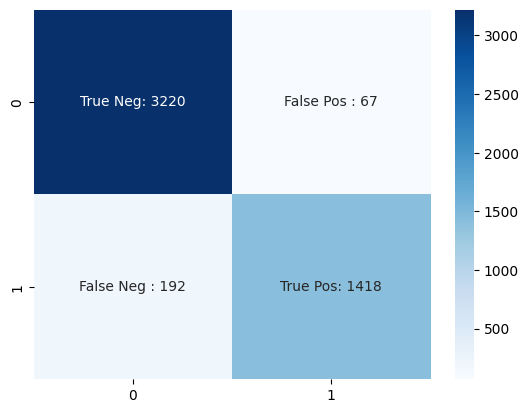

In [128]:
import seaborn as sns

labels = ['True Neg: 3220','False Pos : 67','False Neg : 192','True Pos: 1418']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')
